<h2> Formulating Questions </h2>

Based on the data provided in the data set, we can try do find an answer to the following questions :-

- Q1: What is the possibility of a paid art & design-genre application gets installed over 10000 times ?
- Q2: What is the possibility of a business-genre application that is installed over 1000 times gets a rating of 4.4 or more ?
- Q3: Find the number of dating apps installed per content rating (eg. Mature, Teen... etc).
- Q4: What is the possibility of a music-genre app over the size of 30 MB gets a rating of 4.0 or more ?

Thus we have no need for the following columns :-

*App - Reviews - Type - Category - Last Updated - Current Ver - Android Ver - Primary Gerners - Secondary Genres*

we then omit them to reduce the data arity.

<h2>Import dependencies</h2>

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2>Import data</h2>

In [175]:
data = pd.read_csv("./data/googleplaystore_clean.csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Primary Genres,Secondary Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,1,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,Art & Design,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,1,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,1,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,Art & Design,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,2,Art & Design,8-Jun-18,Varies with device,4.2 and up,Art & Design,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,1,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,Art & Design,Creativity


In [176]:
# We delete the unnecessary columns
reduced_data = data.drop(["App", "Reviews", "Type", "Category", "Last Updated", "Current Ver", "Android Ver", "Primary Genres", "Secondary Genres"], axis=1)
reduced_data.head()

,Rating,Size,Installs,Price,Content Rating,Genres
0,4.1,19000000.0,10000,0.0,1,Art & Design
1,3.9,14000000.0,500000,0.0,1,Art & Design;Pretend Play
2,4.7,8700000.0,5000000,0.0,1,Art & Design
3,4.5,25000000.0,50000000,0.0,2,Art & Design
4,4.3,2800000.0,100000,0.0,1,Art & Design;Creativity


,Rating,Size,Installs,Price,Content Rating,Genres
2999,4.7,3500000.0,5000,1.99,1,Art & Design
3003,4.8,8600000.0,10000,1.99,1,Art & Design
3008,4.7,3500000.0,1000,1.99,1,Art & Design


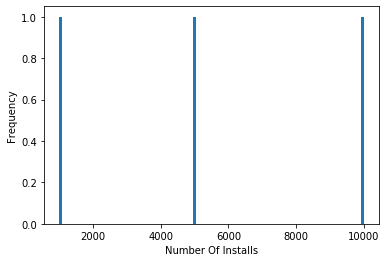

In [177]:
# Q1 : What is the possibility of a paid art & design-genre application gets installed over 10000 times ?

#  We get only the paid apps
x = reduced_data[reduced_data['Price'].gt(0)]

# Then we filter by the genre 'Art & Design'
x = x[x['Genres'] == 'Art & Design']

# We plot a histogram to visualize the data
x['Installs'].plot(kind='hist', bins=100)
plt.xlabel('Number Of Installs')
x

In [178]:
# Answer 1 :-

# The probability would be the number of apps installed more than 10000 times over the total number of X
A1 = len(x[x['Installs'].ge(10000)].index) / len(x.index)

print(A1)


0.3333333333333333


Thus we have **1/3** probability that an Art/Design paid app gets installed over 10000 times.

Text(0.5, 0, 'Rating')

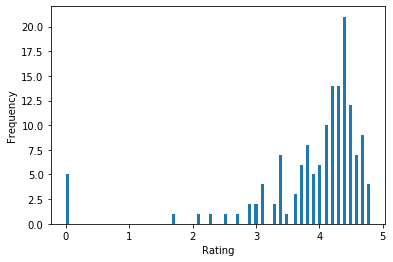

In [179]:
# Q2: What is the possibility of a business-genre application that is installed over 1000 times gets a rating of 4.4 or more ?

#  We filter the data that has less than 1000 installs.
x = reduced_data[reduced_data['Installs'].gt(1000)]

# Then we fillter by genres to get only 'Buisness' genre.
x = x[x['Genres'] == 'Business']

# We plot a histogram to visualize the data
x['Rating'].plot(kind='hist', bins=100)
plt.xlabel('Rating')

In [180]:
# Answer 2 :-

# The probability would be the number of apps in X has a rating greater than or equal 4.4 over the total number of apps in X
A2 = len(x[x['Rating'].ge(4.4)].index) / len(x.index)

print(A2)


0.36054421768707484


Thus we have **0.3605** probability that a business-genre application that is installed over 1000 times gets a rating of 4.4 or more.

Number Of Installs For Dating Apps With Everyone Rating = 1017396
Number Of Installs For Dating Apps With Teen Rating = 1010910
Number Of Installs For Dating Apps With Everyone 10+ Rating = 0
Number Of Installs For Dating Apps With Mature 17+ Rating = 82577801
Number Of Installs For Dating Apps With Adults only 18+ Rating = 0
Number Of Installs For Dating Apps With Unrated Rating = 1010910


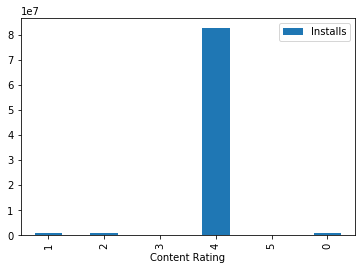

In [181]:
# Q3: Find the number of dating apps installed per content rating (eg. Mature, Teen... etc).

# First fillter the data to deal with only the genre 'Dating'
x = reduced_data[reduced_data['Genres'] == 'Dating']

# Answer 3:-

# We calculate thre number of installs per each content rating
r1 = x[x["Content Rating"].eq(1)]['Installs'].sum()
r2 = x[x["Content Rating"].eq(2)]['Installs'].sum()
r3 = x[x["Content Rating"].eq(3)]['Installs'].sum()
r4 = x[x["Content Rating"].eq(4)]['Installs'].sum()
r5 = x[x["Content Rating"].eq(5)]['Installs'].sum()
r0 = x[x["Content Rating"].eq(2)]['Installs'].sum()

# Then we put it into a new data frame to plot it
A3 = pd.DataFrame()

A3['Installs'] = [r1, r2, r3, r4, r5, r0]
A3['Content Rating'] = [1, 2, 3, 4, 5, 0]

A3.plot(x = 'Content Rating', y='Installs', kind='bar')

print("Number Of Installs For Dating Apps With Everyone Rating = " + str(r1))
print("Number Of Installs For Dating Apps With Teen Rating = " + str(r2))
print("Number Of Installs For Dating Apps With Everyone 10+ Rating = " + str(r3))
print("Number Of Installs For Dating Apps With Mature 17+ Rating = " + str(r4))
print("Number Of Installs For Dating Apps With Adults only 18+ Rating = " + str(r5))
print("Number Of Installs For Dating Apps With Unrated Rating = " + str(r0))

The majority of the dating apps installed has a rating of **Mature 17+**

Text(0.5, 0, 'Rating')

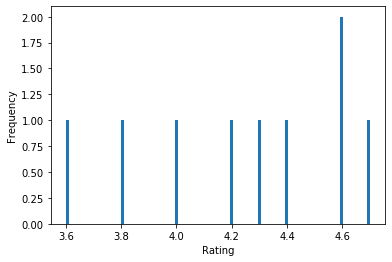

In [182]:
# Q4: How many apps that are over 30 MB in size of genre music has rating of 4.4 or more ?

# First we fillter by the size of app
x = reduced_data[reduced_data['Size'].gt(30000000)]

# Then we only consider the music genre apps
x = x[x['Genres'] == 'Music']

# After that we plot a histogram
x['Rating'].plot(kind='hist', bins=100)
plt.xlabel('Rating')

In [184]:
# Answer 4 :-

# The probability would be the number of apps in X has a rating greater than or equal 4.0 over the total number of apps in X
A4 = len(x[x['Rating'].ge(4.0)].index) / len(x.index)

print(A4)


0.7777777777777778


Thus we have **0.7778** probability that a music-genre application over the size of 30MB gets a rating of 4.0 or more.